In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
import dtale
dtale.show(df)

2021-11-10 15:28:49,877 - INFO     - NumExpr defaulting to 8 threads.


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


When i checked for missing value with isnull() method, I could not find any missing value. But when I check the info() method, there is a problem with the TotalCharges column. Ideally it should be int type but in info, its showing object, hence i checked the TotalChanrges manually to identify the problem and found that there are some balnk values in the column, which we could not identify first time.

In [5]:
df = df.copy()

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As i thought, there are 11 missing values in TotalCharges. Now let us fill them.

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


1. SerniorCitizen column is already been encoded in 1 and 0.
2. Average tenure is 32.37 months where highest tenure is 72 months and lowest being 0 month.
3. Monthly charges and total charges are having very high range starting from 18.8 to 118.75 and 8684.8 respectively.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

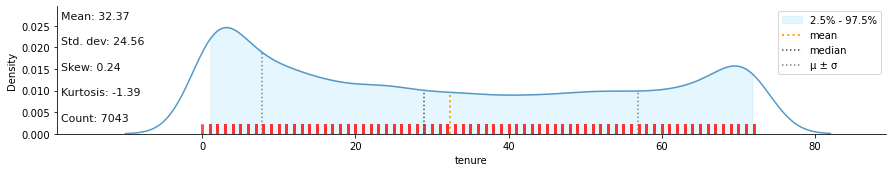

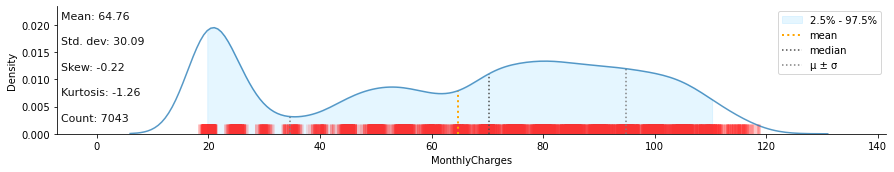

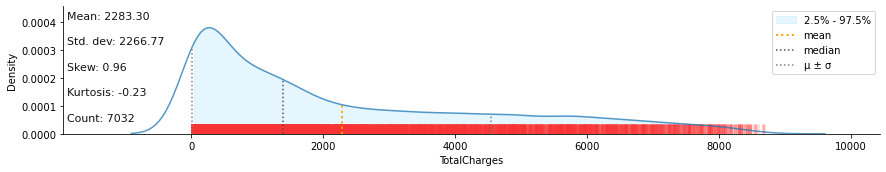

In [12]:
%matplotlib inline
import klib
klib.dist_plot(df)

As we found erlier, there are missing values in the TotalCharges, when i checked the skewness, the distribution is skewed to right. So, median is the best imputation method to fill the missing values.

In [13]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#To display plot in center
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

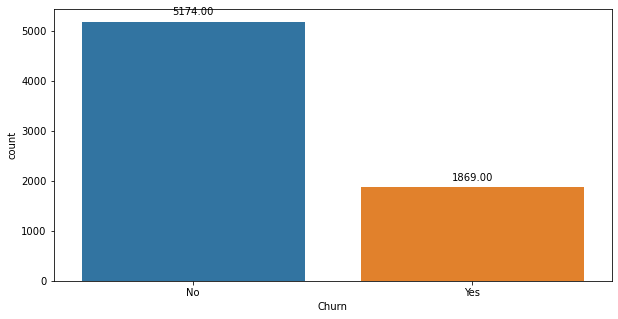

In [16]:
plt.figure(figsize=[10,5])
c =sns.countplot(data=df, x= 'Churn')
for p in c.patches:
    c.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

There is clear cut class imbalance, hence we need to balace the classes before fitting the model.

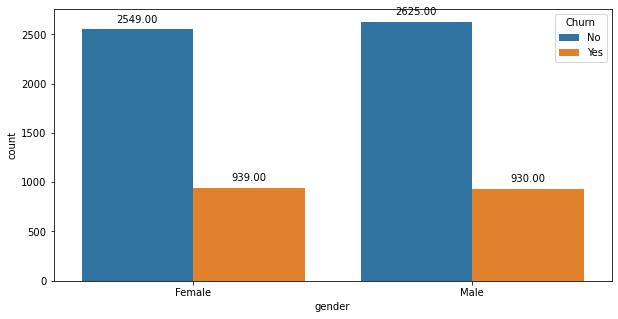

In [17]:
plt.figure(figsize=[10,5])
g =sns.countplot(data=df, x= 'gender', hue='Churn')
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

As per the above plot, we can see that gender has no much impact on the churning rate. Both male and female have amost same ratios of churning.

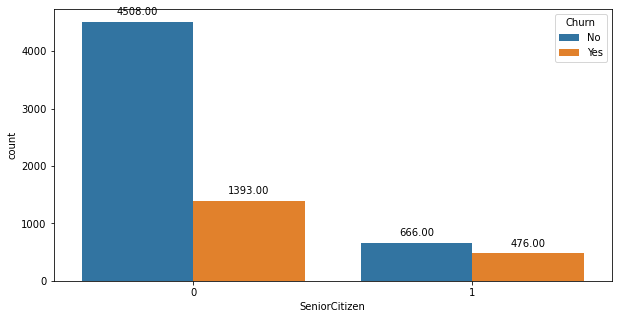

In [18]:
plt.figure(figsize=[10,5])
sc =sns.countplot(data=df, x= 'SeniorCitizen', hue='Churn')
for p in sc.patches:
    sc.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

As per the above plot, only 17% of all the cutomer are senior citzen. 

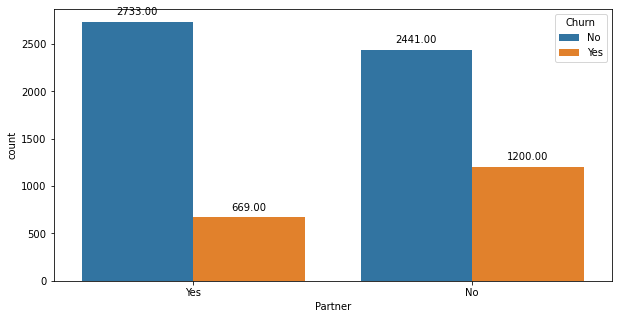

In [19]:
plt.figure(figsize=[10,5])
pa =sns.countplot(data=df, x= 'Partner', hue='Churn')
for p in pa.patches:
    pa.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who have partner are tend to stay longer compared to those who do not have partner.

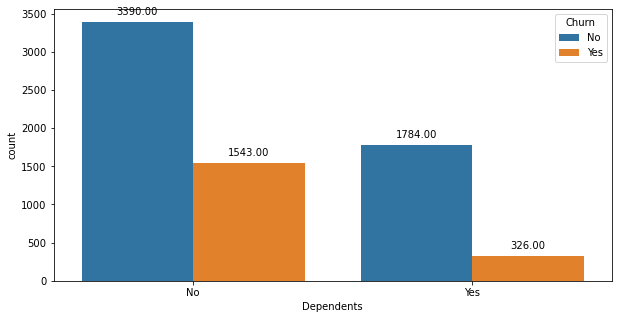

In [20]:
plt.figure(figsize=[10,5])
d =sns.countplot(data=df, x= 'Dependents', hue='Churn')
for p in d.patches:
    d.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [21]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

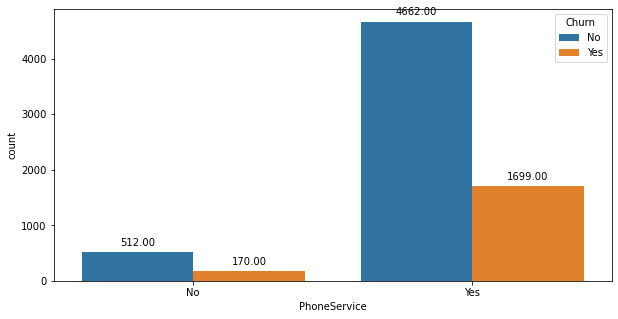

In [22]:
plt.figure(figsize=[10,5])
ps =sns.countplot(data=df, x= 'PhoneService', hue='Churn')
for p in ps.patches:
    ps.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Majority of the people have the Phoneservice. But both, people with or without phoneservice, both have almost same churing rate of 25%-26%.

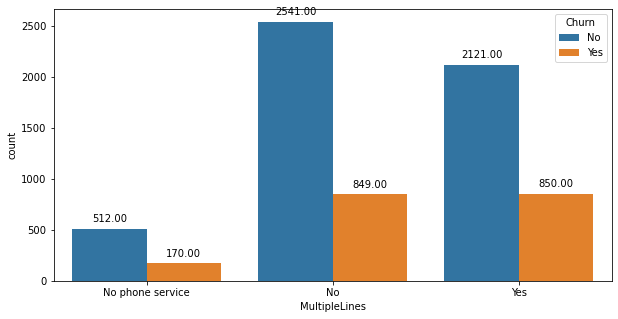

In [23]:
plt.figure(figsize=[10,5])
ml =sns.countplot(data=df, x= 'MultipleLines', hue='Churn')
for p in ml.patches:
    ml.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The chruning rate for those who have multiple lines is 28% which is little higher than those who have no multipleline and no phone service.

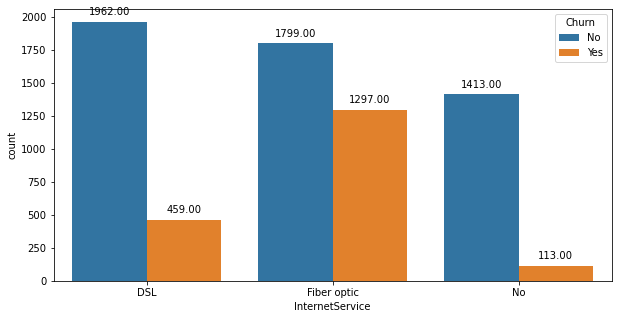

In [24]:
plt.figure(figsize=[10,5])
iss =sns.countplot(data=df, x= 'InternetService', hue='Churn')
for p in iss.patches:
    iss.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who have fiber optic internet service are having the highest churning rate which is 43%.
The same for those having DSL internet service is 19% and those who have no internet service is only 7%.

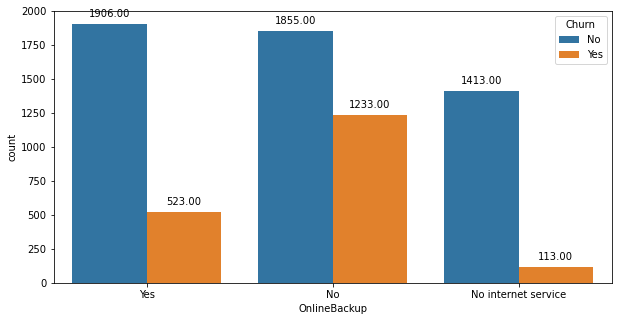

In [25]:
plt.figure(figsize=[10,5])
ob =sns.countplot(data=df, x= 'OnlineBackup', hue='Churn')
for p in ob.patches:
    ob.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who don't have online backup are having the highest churning rate which is 40%.
The same for those having online backup is 21% and those who have no internet service is only 7%.

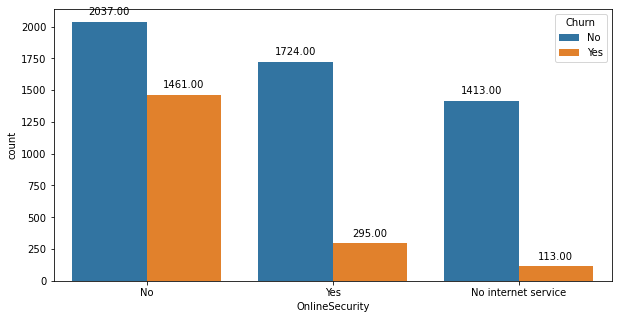

In [26]:
plt.figure(figsize=[10,5])
os =sns.countplot(data=df, x= 'OnlineSecurity', hue='Churn')
for p in os.patches:
    os.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who don't have online services are having the highest churning rate which is 42%.
The same for those having online backup is 15% and those who have no internet service is only 7%.

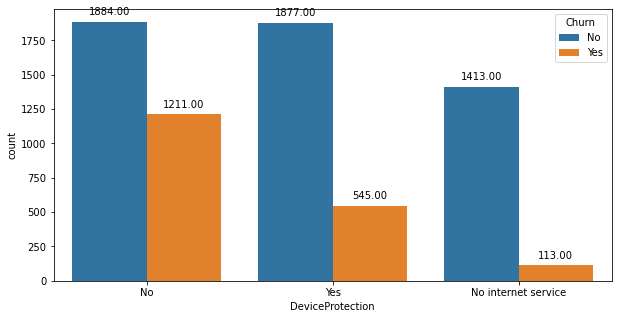

In [27]:
plt.figure(figsize=[10,5])
dp =sns.countplot(data=df, x= 'DeviceProtection', hue='Churn')
for p in dp.patches:
    dp.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who don't have Device protection are having the highest churning rate which is 39%.
The same for those having Device protection is 22% and those who have no internet service is only 7%.

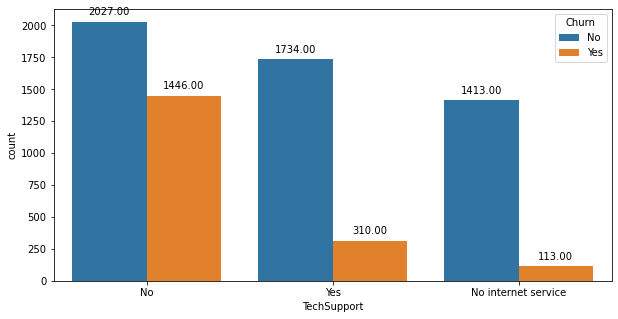

In [28]:
plt.figure(figsize=[10,5])
ts =sns.countplot(data=df, x= 'TechSupport', hue='Churn')
for p in ts.patches:
    ts.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who don't have Tech support are having the highest churning rate which is 42%.
The same for those having Tech support is 15% and those who have no internet service is only 7%.

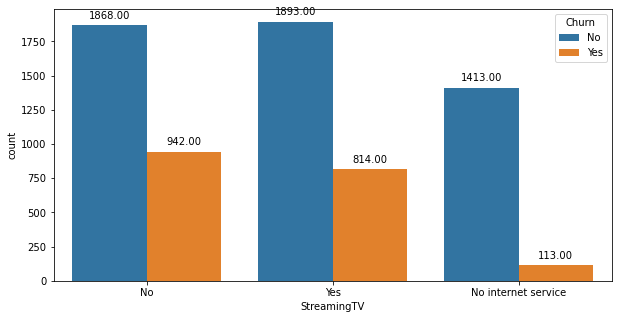

In [29]:
plt.figure(figsize=[10,5])
st =sns.countplot(data=df, x= 'StreamingTV', hue='Churn')
for p in st.patches:
    st.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who don't stream TV are having the highest churning rate which is 34%.
The same for those who stream TV is 30% and those who have no internet service is only 7%.

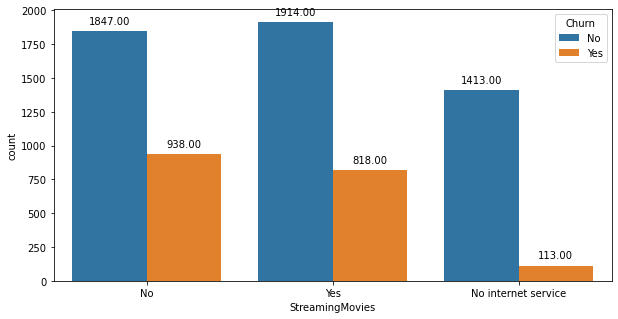

In [30]:
plt.figure(figsize=[10,5])
sm =sns.countplot(data=df, x= 'StreamingMovies', hue='Churn')
for p in sm.patches:
    sm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who don't stream TV are having the highest churning rate which is 34%.
The same for those who stream TV is 30% and those who have no internet service is only 7%.

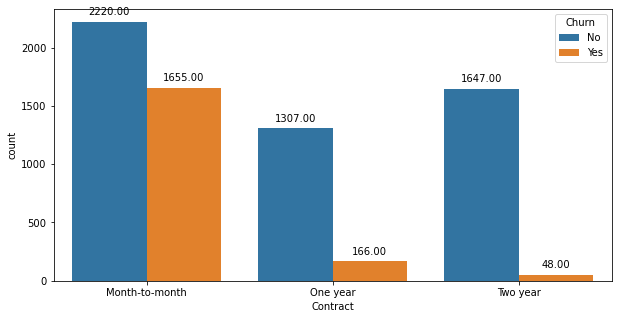

In [31]:
plt.figure(figsize=[10,5])
c =sns.countplot(data=df, x= 'Contract', hue='Churn')
for p in c.patches:
    c.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who have month-to-month contract are having the highest churning rate which is 43%.
The same for those who have one year contract is 30% and those who have two year contract is only 3%.

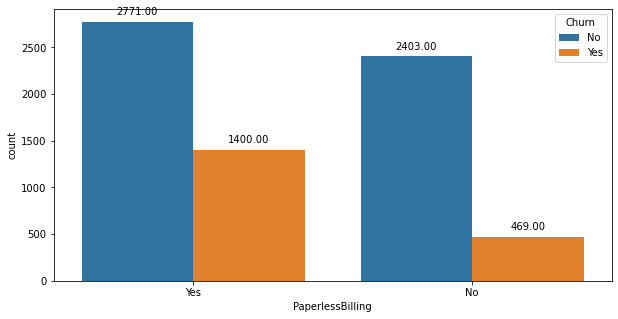

In [32]:
plt.figure(figsize=[10,5])
pb =sns.countplot(data=df, x= 'PaperlessBilling', hue='Churn')
for p in pb.patches:
    pb.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who have paperless billing are having the very high churning rate which is 34% compared to those who do not have paperless billing i.e. only 16%

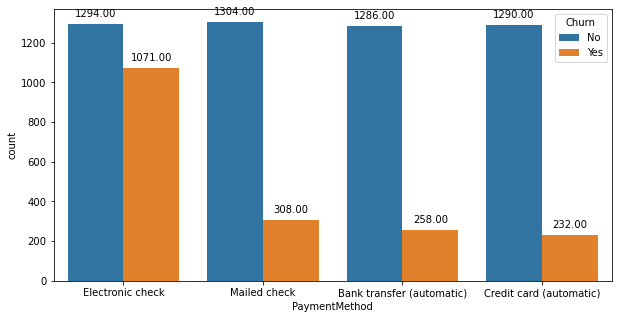

In [33]:
plt.figure(figsize=[10,5])
pm =sns.countplot(data=df, x= 'PaymentMethod', hue='Churn')
for p in pm.patches:
    pm.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Those who have Electronic check as the payment method are having the highest churning rate which is 45%.
The same for those who have Mailed check as the payment method is 19, for those who have Bank transfer(automatic) as the payment method is 19% and those who have credit card(automatic) as the payment method is only 15%.

In [34]:
df.drop(['customerID'], axis=1, inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['gender'] = LE.fit_transform(df['gender'])
df['SeniorCitizen'] = LE.fit_transform(df['SeniorCitizen'])
df['Partner'] = LE.fit_transform(df['Partner'])
df['Dependents'] = LE.fit_transform(df['Dependents'])
df['PhoneService'] = LE.fit_transform(df['PhoneService'])
df['MultipleLines'] = LE.fit_transform(df['MultipleLines'])
df['InternetService'] = LE.fit_transform(df['InternetService'])
df['OnlineSecurity'] = LE.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = LE.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = LE.fit_transform(df['DeviceProtection'])
df['StreamingTV'] = LE.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = LE.fit_transform(df['StreamingMovies'])
df['Contract'] = LE.fit_transform(df['Contract'])
df['PaperlessBilling'] = LE.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = LE.fit_transform(df['PaymentMethod'])
df['TechSupport'] = LE.fit_transform(df['TechSupport'])
df['Churn'] = LE.fit_transform(df['Churn'])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


<AxesSubplot:>

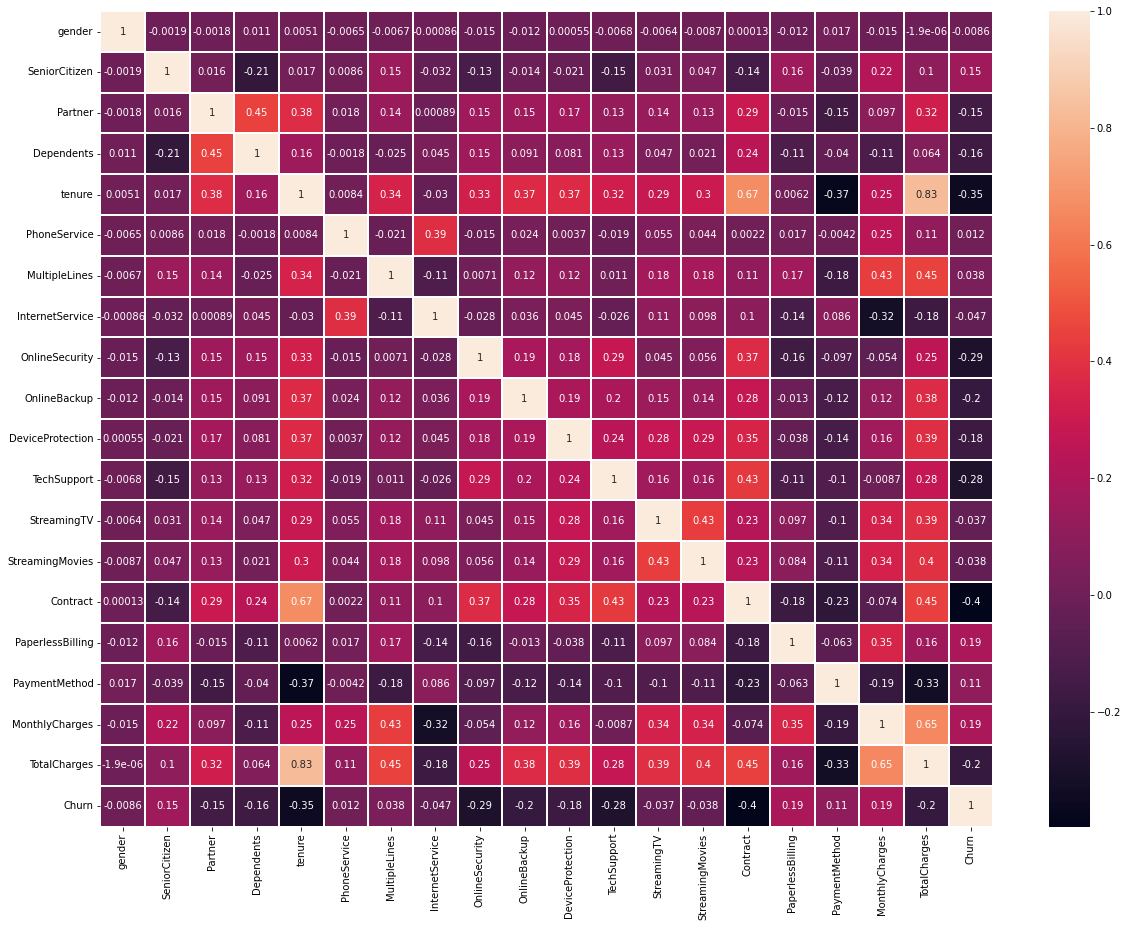

In [37]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, linewidths=1)

Total Charges, Monthly charges, tenure and Contract have the proble of multicolinearity, hence i have to drop some of these variables. If i drop Total charges, which has high correlation with tenure and Monthly charges will be solved and another column which i will drop is contract. 

In [38]:
df.drop(['TotalCharges', 'Contract'], axis=1, inplace=True)

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df))

threshold=3
print(np.where(z>3))

df_new=df[(z<3).all(axis=1)]
df_new

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,1,3,53.85,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,2,70.70,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,1,2,99.65,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,1,1,89.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,1,0,21.15,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,3,84.80,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,103.20,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,1,3,74.40,1


When i checked the outliers, we got almost 700 records and if we drop them we will loose almost 10% of the data. Hence i can not proceed with it.

In [40]:
dfx = df.iloc[:,:-1]
dfx

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,3,84.80
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,103.20
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,1,3,74.40


In [41]:
dfy = df.iloc[:,-1:]
dfy

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

Now i will balance the target classes so that we can fit them in them ML.

In [43]:
trainx, trainy = sm.fit_resample(dfx, dfy)

In [44]:
trainx.shape

(10348, 17)

In [45]:
trainy.shape

(10348, 1)

In [46]:
trainy.value_counts()

Churn
1        5174
0        5174
dtype: int64

With the help of SMOTE we have balance the dataset. Now we have equal number of rows for both classes.

In [47]:
from sklearn.preprocessing import power_transform
data = power_transform(trainx, method = "yeo-johnson")
data

array([[-0.89615935, -0.40900744,  1.27035088, ...,  0.81039516,
         0.41258748, -1.31100218],
       [ 1.11587297, -0.40900744, -0.78718409, ..., -1.23396591,
         1.439459  , -0.41874826],
       [ 1.11587297, -0.40900744, -0.78718409, ...,  0.81039516,
         1.439459  , -0.52523678],
       ...,
       [ 1.11587297, -0.40900744, -0.78718409, ..., -1.23396591,
        -1.55312984,  1.37483887],
       [ 1.11587297, -0.40900744,  1.27035088, ...,  0.81039516,
        -0.5890655 ,  0.01303836],
       [-0.89615935, -0.40900744, -0.78718409, ..., -1.23396591,
         0.41258748,  0.23210399]])

In [48]:
x = pd.DataFrame(data)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.896159,-0.409007,1.270351,-0.531749,-1.522211,-3.038982,0.314583,-1.319589,-0.818960,1.260701,-0.95338,-0.819418,-1.092770,-1.099264,0.810395,0.412587,-1.311002
1,1.115873,-0.409007,-0.787184,-0.531749,0.550341,0.329058,-1.032910,-1.319589,1.408483,-0.945601,1.25372,-0.819418,-1.092770,-1.099264,-1.233966,1.439459,-0.418748
2,1.115873,-0.409007,-0.787184,-0.531749,-1.319489,0.329058,-1.032910,-1.319589,1.408483,1.260701,-0.95338,-0.819418,-1.092770,-1.099264,0.810395,1.439459,-0.525237
3,1.115873,-0.409007,-0.787184,-0.531749,0.849412,-3.038982,0.314583,-1.319589,1.408483,-0.945601,1.25372,1.406198,-1.092770,-1.099264,-1.233966,-1.553130,-0.912704
4,-0.896159,-0.409007,-0.787184,-0.531749,-1.319489,0.329058,-1.032910,0.301116,-0.818960,-0.945601,-0.95338,-0.819418,-1.092770,-1.099264,0.810395,0.412587,0.064644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.896159,-0.409007,-0.787184,-0.531749,-0.300544,0.329058,-1.032910,0.301116,-0.818960,0.621662,1.25372,-0.819418,-1.092770,-1.099264,0.810395,0.412587,0.453184
10344,-0.896159,-0.409007,-0.787184,-0.531749,-1.522211,0.329058,-1.032910,-1.319589,-0.818960,-0.945601,-0.95338,-0.819418,1.107121,-1.099264,-1.233966,1.439459,-0.479752
10345,1.115873,-0.409007,-0.787184,-0.531749,0.457159,0.329058,1.084634,0.301116,-0.818960,1.260701,1.25372,-0.819418,1.107121,1.101092,-1.233966,-1.553130,1.374839
10346,1.115873,-0.409007,1.270351,-0.531749,-0.088472,0.329058,-1.032910,0.301116,-0.818960,-0.945601,-0.95338,-0.819418,-1.092770,-1.099264,0.810395,-0.589066,0.013038


As i could not remove the outliers, i have transformed the dataset and as the result the skewness in the data has reduced.

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.89615935, -0.40900744,  1.27035088, ...,  0.81039516,
         0.41258748, -1.31100218],
       [ 1.11587297, -0.40900744, -0.78718409, ..., -1.23396591,
         1.439459  , -0.41874826],
       [ 1.11587297, -0.40900744, -0.78718409, ...,  0.81039516,
         1.439459  , -0.52523678],
       ...,
       [ 1.11587297, -0.40900744, -0.78718409, ..., -1.23396591,
        -1.55312984,  1.37483887],
       [ 1.11587297, -0.40900744,  1.27035088, ...,  0.81039516,
        -0.5890655 ,  0.01303836],
       [-0.89615935, -0.40900744, -0.78718409, ..., -1.23396591,
         0.41258748,  0.23210399]])

In [50]:
maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,trainy,test_size=0.3, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxscore:
        maxscore=acc
        maxRS=i
print("Best accuracy score we can achive is  ", maxscore, 'at an ideal Random state ', maxRS)

Best accuracy score we can achive is   0.8041867954911434 at an ideal Random state  141


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,trainy,test_size=0.3, random_state=141)

In [52]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(), RandomForestClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    print('accuracy_score of',m,"is:")
    print(accuracy_score(y_test,m_pred))
    print(confusion_matrix(y_test,m_pred))
    print(classification_report(y_test,m_pred))
    print("\n")

accuracy_score of DecisionTreeClassifier() is:
0.8054750402576489
[[1229  315]
 [ 289 1272]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1544
           1       0.80      0.81      0.81      1561

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



accuracy_score of SVC() is:
0.8093397745571659
[[1238  306]
 [ 286 1275]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1544
           1       0.81      0.82      0.81      1561

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



accuracy_score of KNeighborsClassifier() is:
0.7739130434782608
[[1095  449]
 [ 253 1308]]
              precision    recall  f1-score   support

           0       0.81      

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,x,trainy,cv=kfold)
    print(i, "CV Score is ",score.mean())

DecisionTreeClassifier() CV Score is  0.7781323564091968
SVC() CV Score is  0.7692377236546862
KNeighborsClassifier() CV Score is  0.7432466383209233
RandomForestClassifier() CV Score is  0.8308974206307511
LogisticRegression() CV Score is  0.7375355547616879


RandomForestClassifier has the least difference when we compared the accuracy score with CV Score.

In [58]:
parameters = {'n_estimators' : np.arange(1,20),
             'max_features' : ["auto","sqrt","log2"],
             'min_samples_split': np.arange(1,20),
             'bootstrap' : [True, False],
             'oob_score' : [True, False],
             'criterion' : ['gini', 'entropy']}

In [59]:
from sklearn.model_selection import GridSearchCV
GSV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'oob_score': [True, False]})

In [61]:
GSV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_split': 14,
 'n_estimators': 19,
 'oob_score': False}

In [62]:
Final_model = RandomForestClassifier(bootstrap= False, criterion= 'gini', max_features= 'auto', min_samples_split= 14, n_estimators= 19, oob_score=False)
Final_model.fit(x_train,y_train)
Final_model.score(x_train,y_train)
pred=Final_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

84.12238325281804
[[1290  254]
 [ 239 1322]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1544
           1       0.84      0.85      0.84      1561

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [64]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.24251246, 0.34442809, 0.97098516, ..., 0.88165869, 0.12244057,
       0.72078273])

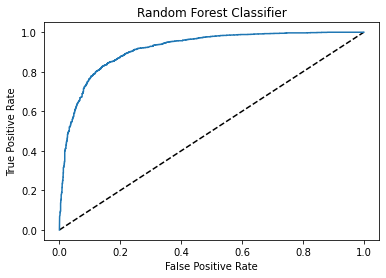

AUC_ROC Score =  0.8411926226379396


In [65]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print('AUC_ROC Score = ',auc_score)

In [66]:
import joblib
joblib.dump(Final_model,'Churn_Analysis.obj')

['Churn_Analysis.obj']

Finally with the help of hyperparameter tuning i achieved the accuracy score of 84%. The same score we can see with AUC ROC curve.